- Objective: Analyze what factors affect car prices
- Dataset source: [Kaggle](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?resource=download)
- Tools used: Python, Pandas, Seaborn, Matplotlib


In [ ]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
print(os.getcwd())

In [ ]:
df = pd.read_csv('../data/CarPrice_Assignment.csv')
df.head(1)

In [ ]:
df.info()

- Database info showed that it contains 26 columns and 250 entries

In [ ]:
df.isnull().any()

- Database Contains no null values

In [ ]:
df.duplicated().any()

- Database Contains no duplicates

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
pd.DataFrame(df.dtypes)

In [ ]:
df.nunique()

- Checking unique values in each column

- Exploring categorical values

#1 fueltype

In [53]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [54]:
df.fueltype.value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

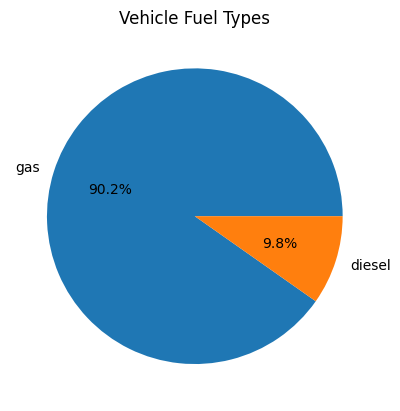

In [55]:
fuel_counts = df['fueltype'].value_counts()
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%')
plt.title('Vehicle Fuel Types')
plt.show()

- Obesrvations:
- Most cars are running gas with 90.2%


#2 fuelsystem

In [56]:
df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [57]:
df.fuelsystem.value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2ac78b91a90>,
 [Text(0.14288238112612972, 1.0906808081027775, 'mpfi'),
  Text(-0.8041694565737162, -0.7505407951030604, '2bbl'),
  Text(0.5254918056125668, -0.9663634731476788, 'idi'),
  Text(0.9093145394748149, -0.6189887465048985, '1bbl'),
  Text(1.053699086692271, -0.3157819417000822, 'spdi'),
  Text(1.093676896387853, -0.11777455713113001, '4bbl'),
  Text(1.0988377159346445, -0.050553674837083784, 'mfi'),
  Text(1.099870841749064, -0.016856199755753802, 'spfi')],
 [Text(0.07793584425061621, 0.5949168044196967, '45.9%'),
  Text(-0.43863788540384513, -0.4093858882380329, '32.2%'),
  Text(0.286631893970491, -0.527107348989643, '9.8%'),
  Text(0.4959897488044444, -0.33763022536630827, '5.4%'),
  Text(0.5747449563776023, -0.1722446954727721, '4.4%'),
  Text(0.5965510343933742, -0.06424066752607091, '1.5%'),
  Text(0.5993660268734424, -0.027574731729318423, '0.5%'),
  Text(0.5999295500449439, -0.00919429077586571, '0.5%')])

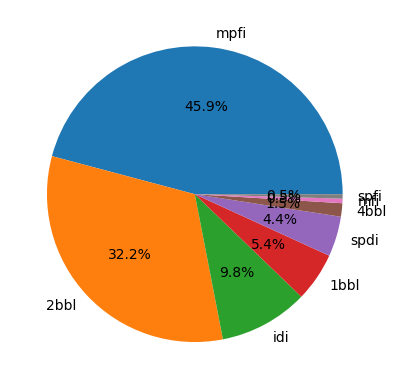

In [58]:
fuel_systemcounts=df.fuelsystem.value_counts()
plt.pie(fuel_systemcounts,labels=fuel_systemcounts.index,autopct='%1.1f%%')

- Pie chart is not very good looking so we use histogram to plot

Text(0.5, 1.0, 'Distribution of Fuel System')

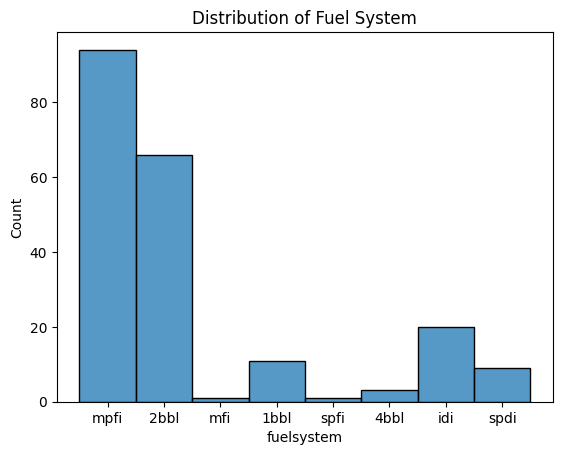

In [59]:
sns.histplot(data=df.fuelsystem)
plt.title('Distribution of Fuel System')


In [49]:
df[df['fuelsystem'] == '4bbl'][['CarName']]


,CarName
55,mazda 626
56,mazda glc
57,mazda rx-7 gs


In [50]:
df[df['fuelsystem'] == 'mfi'][['CarName']]


,CarName
29,dodge coronet custom (sw)


In [51]:
df[df['fuelsystem'] == 'spfi'][['CarName']]


,CarName
46,isuzu D-Max


- Obesrvations:
- The cars with type "4bbl" are mazda
- The car with type "mfi" is dodge
- The car with the type "spfi" is isuzu


#3 aspiration

In [60]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [63]:
aspiration_counts=df['aspiration'].value_counts()
aspiration_counts

aspiration
std      168
turbo     37
Name: count, dtype: int64

Text(0.5, 1.0, 'Aspiration types split')

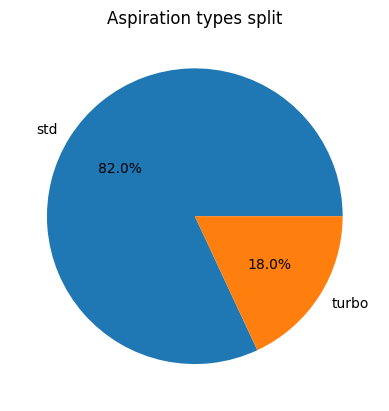

In [69]:
plt.pie(aspiration_counts,labels=aspiration_counts.index,autopct='%1.1f%%')
plt.title('Aspiration types split')

- Cars with std aspiration type dominate the data

In [70]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

#4 doornumber

In [75]:
doornumber_types=df['doornumber'].value_counts()
doornumber_types

doornumber
four    115
two      90
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2ac78d3d810>,
 [Text(-0.20943024478245773, 1.079879147206001, 'four'),
  Text(0.20942995299360936, -1.0798792037950795, 'two')],
 [Text(-0.11423467897224965, 0.5890249893850914, '56.1%'),
  Text(0.114234519814696, -0.5890250202518614, '43.9%')])

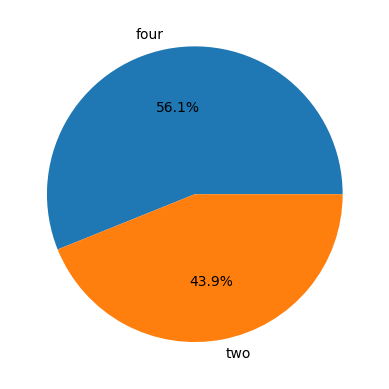

In [77]:
plt.pie(doornumber_types,labels=doornumber_types.index,autopct='%1.1f%%')

#5 carbody

In [78]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [80]:
Carbody_counts=df['carbody'].value_counts()
Carbody_counts

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2ac78d76e90>,
 [Text(0.10939150989124569, 1.0945471655272392, 'sedan'),
  Text(-0.7063487626681991, -0.8432505116969121, 'hatchback'),
  Text(0.7566804268683581, -0.7983950974262802, 'wagon'),
  Text(1.0487361636589596, -0.33189224009290746, 'hardtop'),
  Text(1.0953532541075965, -0.10100123125932357, 'convertible')],
 [Text(0.05966809630431582, 0.5970257266512213, '46.8%'),
  Text(-0.38528114327356316, -0.459954824561952, '34.1%'),
  Text(0.41273477829183164, -0.4354882349597892, '12.2%'),
  Text(0.5720379074503416, -0.1810321309597677, '3.9%'),
  Text(0.5974654113314162, -0.055091580686903764, '2.9%')])

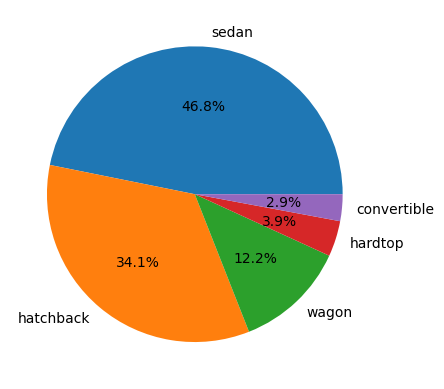

In [82]:
plt.pie(Carbody_counts,labels=Carbody_counts.index,autopct='%1.1f%%')

- Again the pie chart not soo good looking

Text(0.5, 1.0, 'Distribution Car body')

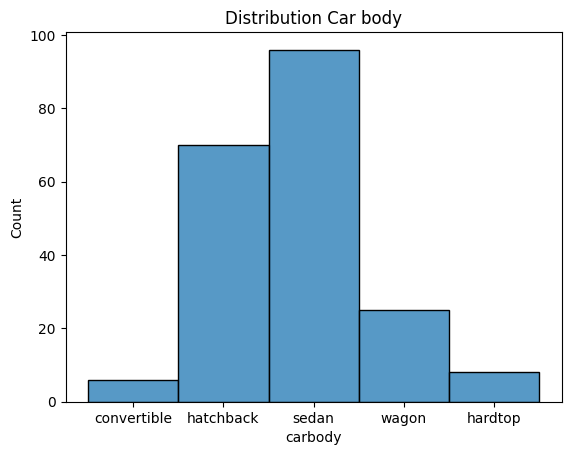

In [95]:
sns.histplot(data=df['carbody'])
plt.title('Distribution Car body')

- Observations
- Most cars are sedan

#6 drivewheel

In [92]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [93]:
drivewheelcounts=df['drivewheel'].value_counts()
drivewheelcounts

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

Text(0.5, 1.0, 'Drivewheel Split')

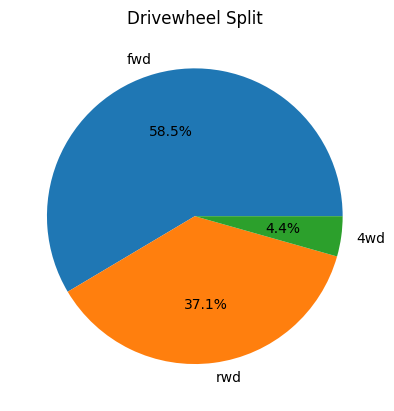

In [97]:
plt.pie(drivewheelcounts,labels=drivewheelcounts.index,autopct='%1.1f%%')
plt.title('Drivewheel Split')

#7 drivewheel

In [100]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [102]:
enginelocationCounts=df['enginelocation'].value_counts()
enginelocationCounts

enginelocation
front    202
rear       3
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2ac79760f50>,
 [Text(-1.098837699462108, 0.05055403288385589, 'front'),
  Text(1.0988377159346445, -0.050553674837083784, 'rear')],
 [Text(-0.5993660178884226, 0.027574927027557754, '98.5%'),
  Text(0.5993660268734424, -0.027574731729318423, '1.5%')])

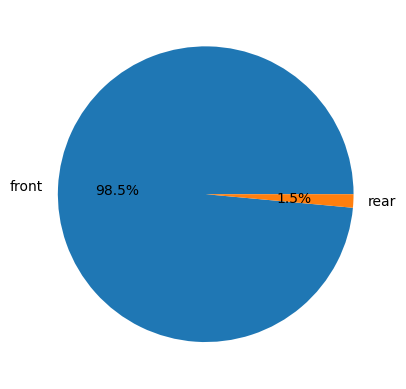

In [105]:
plt.pie(enginelocationCounts,labels=enginelocationCounts.index,autopct='%1.1f%%')

In [108]:
df[df['enginelocation']=='rear']

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,127,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


- Noted here that all rear mounted engines are porsche